## `Background`

Sebuah supermarket memiliki database yang memuat data-data para customer. Database tersebut cukup komprehensif sehingga dapat digunakan untuk keperluan analisis customer mereka, dan diharapkan dapat menjawab pertanyaan-pertanyaan bisnis agar supermarket tersebut dapat terus berkembang secara positif.

## `Pernyataan Masalah`

### 1. Faktor-faktor yang mempengaruhi penjualan
####    - Apakah promotional campaign supermarket selama ini cukup efektif dalam meningkatkan penjualan?
####    - Platform apakah yang menjadi preferensi customer untuk melakukan pembelian?
####    - Apakah ada pengaruh dari demografi customer terhadap pembelian dan jenis produk yang dibeli?

### 2. Segmentasi customer
####    - RFM Analysis
####    - Rekomendasi per segmentasi


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly as pl
import plotly.express as px    
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import phik
from phik.report import plot_correlation_matrix
from phik import report
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, shapiro
import warnings
warnings.filterwarnings("ignore")

## `Dataset`

In [2]:
df = pd.read_csv("SupermarketCustomers.csv", delimiter='\t')
pd.set_option('display.max_columns', None)
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1259,2147,1969,Graduation,Together,76653.0,0,0,16-08-2013,91,736,63,946,219,189,126,1,4,7,11,2,0,0,1,1,0,0,3,11,0
1981,8524,1974,PhD,Divorced,25509.0,1,0,18-09-2012,15,40,3,30,10,7,11,3,3,0,3,9,0,0,0,0,0,0,3,11,1
117,367,1978,2n Cycle,Married,36550.0,1,0,19-02-2013,74,47,90,94,123,103,120,5,9,1,5,9,0,0,0,0,0,0,3,11,0
421,3129,1983,Graduation,Married,30096.0,1,0,22-05-2014,30,5,3,11,12,5,9,1,2,0,3,6,0,0,0,0,0,0,3,11,0
2066,6103,1948,Graduation,Married,42192.0,0,0,06-09-2013,40,40,15,15,17,6,7,1,2,1,3,4,0,0,0,0,0,0,3,11,0


## `Data Understanding`

Dataset memuat data customers dari sebuah supermarket yang memiliki 2240 baris dan 29 kolom, setiap baris menggambarkan informasi seorang customer beserta dengan featuresnya. Berikut penjelasan dari setiap kolomnya :

### People
● ID: Customer's unique identifier

● Year_Birth: Customer's birth year

● Education: Customer's education level

● Marital_Status: Customer's marital status

● Income: Customer's yearly household income

● Kidhome: Number of children in customer's household

● Teenhome: Number of teenagers in customer's household

● Dt_Customer: Date of customer's enrollment with the company

● Recency: Number of days since customer's last purchase

● Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products
● MntWines: Amount spent on wine in last 2 years

● MntFruits: Amount spent on fruits in last 2 years

● MntMeatProducts: Amount spent on meat in last 2 years

● MntFishProducts: Amount spent on fish in last 2 years

● MntSweetProducts: Amount spent on sweets in last 2 years

● MntGoldProds: Amount spent on gold in last 2 years

### Promotion
● NumDealsPurchases: Number of purchases made with a discount

● AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise

● AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise

● AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise

● AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise

● AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise

● Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

### Place
● NumWebPurchases: Number of purchases made through the company’s website

● NumCatalogPurchases: Number of purchases made using a catalog

● NumStorePurchases: Number of purchases made directly in stores

● NumWebVisitsMonth: Number of visits to the company’s website in the last month

Terdapat 2 kolom yang tidak memiliki penjelasan dalam data dictionary tersebut, yaitu kolom 'Z_CostContact', dan 'Z_Revenue', mari kita cari tahu isinya.

In [3]:
df['Z_CostContact'].value_counts()

Z_CostContact
3    2240
Name: count, dtype: int64

In [4]:
df['Z_Revenue'].value_counts()

Z_Revenue
11    2240
Name: count, dtype: int64

Karena tidak ada konteks/keterangaan yang jelas (baik dalam data dictionary dan internet) mengenai kedua kolom tersebut, juga karena seluruh nilainya sama, maka saya memutuskan untuk tidak menggunakannya dalam analisis kali ini, dan akan men-drop seluruh kolomnya saja.

In [5]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [6]:
# Analisa seluruh kolom beserta jumlah non-null dan datatype-nya
df.info()
print(f'Jumlah kolom, baris = {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dari informasi tersebut terdapat beberapa hal yang dapat diperhatikan :
1. Jumlah data yang kita miliki adalah 2240 baris, dan 29 kolom.

2. Terdapat hanya 3 kolom yang tipe datanya object, sedangkan kolom lainnya adalah integer atau float.

3. Tipe data pada kolom "Dt_Customer" adalah object, padahal valuesnya adalah datetime.

4. Terdapat sejumlah missing values pada kolom "Income"

In [7]:
display(df.describe(), df.describe(include=object))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


Hal yang menjadi perhatian:
1. Terdapat kejanggalan pada nilai max kolom 'Income' yang begitu jauh selisihnya jika dibandingkan dengan Q3-nya. patut dicurigai sebagai outlier.

2. Terdapat kejanggalan pada nilai min kolom 'Year_birth' dimana menurut data terdapat customer kita yang lahir dari tahun 1893, sedangkan bahkan customer pertama yang berbelanja pada supermarket kita adalah pada tanggal 2012-07-30 (terlihat dari nilai min pada kolom 'dt_customer).

3. Terdapat missing values pada kolom 'Income', terlihat dari nilai count yang lebih sedikit daripada kolom-kolom lain.

In [8]:
# Formatting kolom "Dt_customer" menjadi datetime datatype hanya dengan mengambil bulannya.

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'] = df['Dt_Customer'].dt.to_period('M')
df['Dt_Customer'].dtypes

period[M]

In [9]:
pd.DataFrame({
    'Column': df.columns.values,
    'Data_type': df.dtypes.values,
    'Null': df.isna().mean().values * 100,
    'Negative': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'N_unique': df.nunique().values,
    'Unique_sample': [df[col].unique() for col in df.columns]
})

,Column,Data_type,Null,Negative,N_unique,Unique_sample
0,ID,int64,0.000000,False,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,int64,0.000000,False,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,object,0.000000,False,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,0.000000,False,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,float64,1.071429,False,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,int64,0.000000,False,3,"[0, 1, 2]"
6,Teenhome,int64,0.000000,False,3,"[0, 1, 2]"
7,Dt_Customer,period[M],0.000000,False,24,"[2012-09, 2014-03, 2013-08, 2014-02, 2014-01, ..."
8,Recency,int64,0.000000,False,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,int64,0.000000,False,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


Hal yang perlu diperhatikan:
1. Pada kolom 'Education' terdapat 2 values yang memaksudkan tingkat pendidikan yang sama, yaitu 'Master' dan '2n Cycle' (berdasarkan riset dari beberapa sumber di internet) maka kedua values ini akan disimplifikasi dengan merubahnya menjadi 'Master' yang lebih umum.

2. Pada kolom 'Marital_Status' terdapat 2 values yang janggal, yaitu 'Absurd' dan 'Yolo'. maka kedua values ini akan disimplifikasi dengan merubahnya menjadi 'Single'.

3. Pada kolom 'Marital_Status' juga terdapat values 'Alone' yang bisa disimplifikasi dengan merubahnya menjadi 'Single'.

In [10]:
# Mensimplifikasi values dalam kolom education (2n Cycle menjadi master)
df['Education'].loc[df['Education']=='2n Cycle'] = 'Master'
df['Education'].value_counts()

Education
Graduation    1127
Master         573
PhD            486
Basic           54
Name: count, dtype: int64

In [11]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [12]:
df['Marital_Status'].loc[(df['Marital_Status']=='Alone') | (df['Marital_Status']=='Absurd') | (df['Marital_Status']=='YOLO')] = 'Single'
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64

Sekarang kita akan melihat kejanggalan pada kolom 'Year_Birth'

In [13]:
df.sort_values(by='Year_Birth', ascending=True).head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
239,11004,1893,Master,Single,60182.0,0,1,2014-05,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0
192,7829,1900,Master,Divorced,36640.0,1,0,2013-09,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,0
424,6932,1941,PhD,Married,93027.0,0,0,2013-04,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,0


Terlihat bahwa ada 3 data yang janggal dimana tahun kelahirannya dibawah tahun 1900 yang mana tidak masuk akal. namun karena tidak bisa dipastikan secara spesifik data yang benar, maka saya memutuskan untuk mengubah valuenya dengan nilai min yang masuk akal yaitu tahun 1940.

In [14]:
df['Year_Birth'].loc[df['Year_Birth']<=1900] = 1940

In [15]:
df.sort_values(by='Year_Birth', ascending=True).head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
239,11004,1940,Master,Single,60182.0,0,1,2014-05,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1940,PhD,Together,83532.0,0,0,2013-09,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0
192,7829,1940,Master,Divorced,36640.0,1,0,2013-09,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,0
424,6932,1941,PhD,Married,93027.0,0,0,2013-04,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,0


Sekarang data yang janggal tersebut sudah ditangani.

## `Data Preparation`

### Handling Duplicates

In [16]:
df.duplicated().sum()

0

Sekilas, terlihat bahwa tidak ada data duplicate, namun mari kita teliti lebih dalam mengingat terdapat kolom id (pasti nilainya unique) yang bisa saja membuatnya menjadi false positive.

In [17]:
# Melihat data duplikat dengan mengabaikan kolom pertama (ID)
df[df.duplicated(subset=df.columns[1:], keep=False)].sort_values(list(df.columns[1:]), ascending=[True]*(len(df.columns)-1))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,1
894,8800,1943,PhD,Divorced,48948.0,0,0,2013-02,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,1
17,4939,1946,Graduation,Together,37760.0,0,0,2012-08,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,0
282,8652,1946,Graduation,Together,37760.0,0,0,2012-08,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,0
182,10562,1946,Master,Married,66835.0,0,0,2013-09,21,620,26,195,34,17,141,1,6,4,13,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,8175,1992,Graduation,Married,34935.0,0,0,2013-06,71,34,4,66,3,10,20,1,2,1,4,7,0,0,0,0,0,0,0
392,2669,1993,Graduation,Single,74293.0,0,0,2014-05,66,375,152,335,93,91,81,1,5,4,6,2,0,0,0,0,0,0,0
928,10037,1993,Graduation,Single,74293.0,0,0,2014-05,66,375,152,335,93,91,81,1,5,4,6,2,0,0,0,0,0,0,0
696,8315,1995,Graduation,Single,34824.0,0,0,2014-03,65,4,2,11,2,0,4,1,1,0,2,6,0,0,0,0,0,0,0


ternyata benar saja, setelah kita melihat duplikat dengan kolom id sebagai pengecualian ternyata terdapat 358 baris data duplikat, maka kita akan drop duplicatenya.

In [18]:
df.drop_duplicates(subset=df.columns[1:], keep='first', inplace=True)

In [19]:
df.duplicated(subset=df.columns[1:], keep=False).value_counts()

False    2056
Name: count, dtype: int64

Setelah drop data duplicate, sekarang data yang kita punya adalah 2057 baris

### Generates New Features

Kolom baru 'MntTotal' untuk melihat total spending dari masing-masing customer, hasil agregasi dari tabel pembelian tiap produk.

In [20]:
df.insert(15, 'MntTotal', value=df[['MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].apply(sum, axis=1))

Dari Informasi kolom kita mengetahui bahwa kolom 'Response' berisi informasi mengenai campaign terakhir yang dilakukan, maka saya akan mengubah nama kolomnya agar lebih mudah dimengerti.

In [21]:
df.rename(columns={'Response': 'AcceptedLastCmp'}, inplace=True)

Membuat kolom baru "Age" berdasarkan kolom "Birth Year"

In [22]:
df.insert(2,'Age', value=df['Year_Birth'].apply(lambda x : 2014-x))

Membuat pengelompokan umur berdasarkan kolom 'Age'

In [23]:
def age(int):
    if int <= 17:
        return "Children"
    elif int <= 25:
        return "Teenager"
    elif int <= 40:
        return "Adult"
    elif int <= 60:
        return "Middle-aged"
    else:
        return "Elderly"

In [24]:
df.insert(3, 'Age_Group', value=df['Age'].apply(age))

Membuat pengelompokan Income customer

In [25]:
df['Income'].quantile([0,0.25,0.5,0.75,1])

0.00      1730.00
0.25     35538.75
0.50     51550.00
0.75     68522.00
1.00    666666.00
Name: Income, dtype: float64

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan income-nya ke dalam 4 kelompok yaitu :
- V.High : Income lebih dari 68211 dollar
- High : Income antara 51766 hingga 68211 dollar
- Medium : Income antara 35702.5 hingga 51766 dollar
- Low : Income antara 1730 hingga 35702.5 dollar

In [26]:
def labelincome(x):
    if x <= 35533.5:
        return 'Low'
    elif x <= 51400.5:
        return 'Medium'
    elif x <= 68334.0:
        return 'High'
    else:
        return 'Very High'
    
df.insert(7, column='Income_Group', value=df['Income'].apply(labelincome))

Kolom 'sum_cmp' untuk menghitung seberapa sering seorang customer menerima campaign

In [27]:
df['sum_cmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4' ,'AcceptedCmp5','AcceptedLastCmp']].apply('sum', axis=1)

Kolom 'Acccmp' untuk mendeterminasi apakah seorang customer pernah menerima campaign atau tidak

In [28]:
df['Acccmp'] = np.where(df['sum_cmp']>0, 1,0)

### Outliers

In [29]:
numerical_col = [var for var in df.columns if (df[var].dtypes != 'object')&(df[var].dtypes != 'Period[M]')]

In [30]:
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_df = []

for column in numerical_col:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df[column]) * 100, 2)
    outlier_df.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_df, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,ID,0,0.00,-5638.375,16890.625
1,Year_Birth,0,0.00,1932.000,2004.000
2,Age,0,0.00,10.000,82.000
3,Income,8,0.39,-13936.125,117996.875
4,Kidhome,0,0.00,-1.500,2.500
5,Teenhome,0,0.00,-1.500,2.500
6,Recency,0,0.00,-51.000,149.000
7,MntWines,33,1.61,-698.875,1226.125
8,MntFruits,207,10.07,-47.000,81.000
9,MntMeatProducts,173,8.41,-305.000,551.000


Mencari batas atas dan batas bawah outlier, beserta jumlah data yang dianggap sebagai outliers.

Terlihat bahwa kebanyakan data outliers terdapat pada kolom-kolom pembelian (Fruits, Meat, Fish, Sweet, Gold)
namun kita tidak akan menghapus data outliers karena outlier yang tidak begitu signifikan, dan dikhawatirkan jika dihapus malah akan mempengaruhi hasil analisa karena jumlah data yang semakin sedikit.

Namun seperti sudah terlihat di awal data understanding, bahwa terdapat kejanggalan pada nilai max kolom 'Income', maka mari kita selidiki lebih lanjut

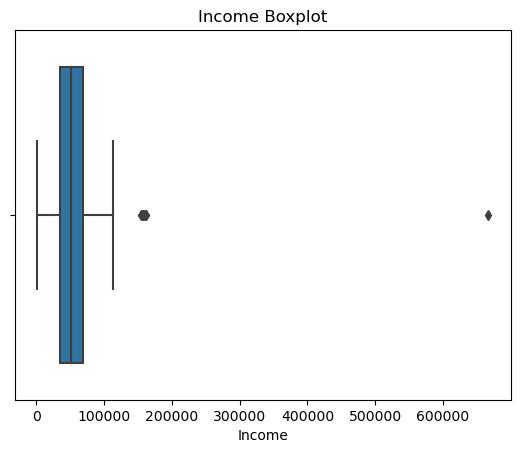

In [31]:
# Melihat outliers pada kolom income

sns.boxplot(
    data=df,
    x='Income'
    )

plt.title('Income Boxplot')
plt.show()    

Terdapat data yang mencurigakan dimana data pada kolom 'Income' secara umum tersebar pada rentang dibawah 100.000, namun ada 1 data outlier yang sangat mencolok jauh, berada di angka 600.000 lebih, Mari kita selidiki lebih lanjut

In [32]:
df.sort_values(by='Income', ascending=False).head(10)

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Group,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedLastCmp,sum_cmp,Acccmp
2233,9432,1977,37,Adult,Graduation,Together,666666.0,Very High,1,0,2013-06,23,9,14,18,8,1,12,62,4,3,1,3,6,0,0,0,0,0,0,0,0,0
617,1503,1976,38,Adult,PhD,Together,162397.0,Very High,1,1,2013-06,31,85,1,16,2,1,2,107,0,0,0,1,1,0,0,0,0,0,0,0,0,0
687,1501,1982,32,Adult,PhD,Married,160803.0,Very High,0,0,2012-08,21,55,16,1622,17,3,4,1717,15,0,28,1,0,0,0,0,0,0,0,0,0,0
1300,5336,1971,43,Middle-aged,Master,Together,157733.0,Very High,1,0,2013-06,37,39,1,9,2,0,8,59,0,1,0,1,1,0,0,0,0,0,0,0,0,0
164,8475,1973,41,Middle-aged,PhD,Married,157243.0,Very High,0,1,2014-03,98,20,2,1582,1,2,1,1608,15,0,22,0,0,0,0,0,0,0,0,0,0,0
1653,4931,1977,37,Adult,Graduation,Together,157146.0,Very High,0,0,2013-04,13,1,0,1725,2,1,1,1730,0,0,28,0,1,0,0,0,0,0,0,0,0,0
2132,11181,1949,65,Elderly,PhD,Married,156924.0,Very High,0,0,2013-08,85,2,1,2,1,1,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
655,5555,1975,39,Adult,Graduation,Divorced,153924.0,Very High,0,0,2014-02,81,1,1,1,1,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1898,4619,1945,69,Elderly,PhD,Single,113734.0,Very High,0,0,2014-05,9,6,2,3,1,262,3,277,0,27,0,0,1,0,0,0,0,0,0,0,0,0
646,4611,1970,44,Middle-aged,Graduation,Together,105471.0,Very High,0,0,2013-01,36,1009,181,104,202,21,207,1724,0,9,8,13,3,0,0,1,1,0,0,1,3,1


Kecurigaan semakin meningkat karena setelah diselidiki lebih jauh terlihat bahwa bahkan value tertinggi ke 2 berada di angka 160.000 dengan tingkat pendidikan PhD, sedangkan yang menempati value tertinggi tingkat pendidikannya adalah Graduation, perbedaan dalam tingkat edukasi dan perbedaan nilai income sangat signifikan sehingga dapat mempengaruhi data kita.

Maka diputuskan bahwa baris tersebut di-drop saja karena tidak memungkinkan untuk mendeterminasi nilai sebenarnya dari baris tersebut

In [33]:
df.drop(df[df['ID']==9432].index, inplace=True)

df.shape

(2055, 33)

In [34]:
df.sort_values(by='Income', ascending=False).head(10)

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Group,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedLastCmp,sum_cmp,Acccmp
617,1503,1976,38,Adult,PhD,Together,162397.0,Very High,1,1,2013-06,31,85,1,16,2,1,2,107,0,0,0,1,1,0,0,0,0,0,0,0,0,0
687,1501,1982,32,Adult,PhD,Married,160803.0,Very High,0,0,2012-08,21,55,16,1622,17,3,4,1717,15,0,28,1,0,0,0,0,0,0,0,0,0,0
1300,5336,1971,43,Middle-aged,Master,Together,157733.0,Very High,1,0,2013-06,37,39,1,9,2,0,8,59,0,1,0,1,1,0,0,0,0,0,0,0,0,0
164,8475,1973,41,Middle-aged,PhD,Married,157243.0,Very High,0,1,2014-03,98,20,2,1582,1,2,1,1608,15,0,22,0,0,0,0,0,0,0,0,0,0,0
1653,4931,1977,37,Adult,Graduation,Together,157146.0,Very High,0,0,2013-04,13,1,0,1725,2,1,1,1730,0,0,28,0,1,0,0,0,0,0,0,0,0,0
2132,11181,1949,65,Elderly,PhD,Married,156924.0,Very High,0,0,2013-08,85,2,1,2,1,1,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
655,5555,1975,39,Adult,Graduation,Divorced,153924.0,Very High,0,0,2014-02,81,1,1,1,1,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1898,4619,1945,69,Elderly,PhD,Single,113734.0,Very High,0,0,2014-05,9,6,2,3,1,262,3,277,0,27,0,0,1,0,0,0,0,0,0,0,0,0
646,4611,1970,44,Middle-aged,Graduation,Together,105471.0,Very High,0,0,2013-01,36,1009,181,104,202,21,207,1724,0,9,8,13,3,0,0,1,1,0,0,1,3,1
252,10089,1974,40,Adult,Graduation,Divorced,102692.0,Very High,0,0,2013-04,5,168,148,444,32,172,148,1112,1,6,9,13,2,0,1,1,1,1,0,1,5,1


Setelah outliernya di-drop maka berikut adalah income diurutkan dari yang tertinggi.

### Handling Missing Values

In [35]:
# Mencari jumlah Missing values pada setiap kolom

df.isna().sum()

ID                      0
Year_Birth              0
Age                     0
Age_Group               0
Education               0
Marital_Status          0
Income                 24
Income_Group            0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
MntTotal                0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
AcceptedLastCmp         0
sum_cmp                 0
Acccmp                  0
dtype: int64

Terdapat 24 baris missing values pada kolom income. Kita akan mengisi seluruh missing values dengan nilai median berdasarkan kolom 'education' dan 'Age_group' (median digunakan karena data pada kolom income jelas tidak terdistribusi normal terlihat dari boxplot yang kita sudah buat di atas dan lebih baik jika terdapat outliers)

In [36]:
df[df['Income'].isna()]

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Group,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedLastCmp,sum_cmp,Acccmp
10,1994,1983,31,Adult,Graduation,Married,NaN,Very High,1,0,2013-11,11,5,5,6,0,2,1,19,1,1,0,2,7,0,0,0,0,0,0,0,0,0
27,5255,1986,28,Adult,Graduation,Single,NaN,Very High,1,0,2013-02,19,5,1,3,3,263,362,637,0,27,0,0,1,0,0,0,0,0,0,0,0,0
43,7281,1959,55,Middle-aged,PhD,Single,NaN,Very High,0,0,2013-11,80,81,11,50,3,2,39,186,1,1,3,4,2,0,0,0,0,0,0,0,0,0
48,7244,1951,63,Elderly,Graduation,Single,NaN,Very High,2,1,2014-01,96,48,5,48,6,10,7,124,3,2,1,4,6,0,0,0,0,0,0,0,0,0
58,8557,1982,32,Adult,Graduation,Single,NaN,Very High,1,0,2013-06,57,11,3,22,2,2,6,46,2,2,0,3,6,0,0,0,0,0,0,0,0,0
71,10629,1973,41,Middle-aged,Master,Married,NaN,Very High,1,0,2012-09,25,25,3,43,17,4,17,109,3,3,0,3,8,0,0,0,0,0,0,0,0,0
90,8996,1957,57,Middle-aged,PhD,Married,NaN,Very High,2,1,2012-11,4,230,42,192,49,37,53,603,12,7,2,8,9,0,0,0,0,0,0,0,0,0
91,9235,1957,57,Middle-aged,Graduation,Single,NaN,Very High,1,1,2014-05,45,7,0,8,2,0,1,18,1,1,0,2,7,0,0,0,0,0,0,0,0,0
92,5798,1973,41,Middle-aged,Master,Together,NaN,Very High,0,0,2013-11,87,445,37,359,98,28,18,985,1,2,4,8,1,0,0,0,0,0,0,0,0,0
128,8268,1961,53,Middle-aged,PhD,Married,NaN,Very High,0,1,2013-07,23,352,0,27,10,0,15,404,3,6,1,7,6,0,0,0,0,0,0,0,0,0


In [37]:
df.groupby(['Education', 'Age_Group'])[['Income']].median().round()

Income
Education  Age_Group           
Basic      Adult        20310.0
           Elderly      26997.0
           Middle-aged  22256.0
           Teenager     17372.0
Graduation Adult        43776.0
           Elderly      58930.0
           Middle-aged  55430.0
           Teenager     49278.0
Master     Adult        38702.0
           Elderly      60182.0
           Middle-aged  52862.0
           Teenager     61618.0
PhD        Adult        49847.0
           Elderly      59292.0
           Middle-aged  54693.0
           Teenager     68404.0

tabel inilah yang akan digunakan untuk mengisi missing values. pengisian missing values dengan metode ini diharapkan dapat membuat data lebih akurat untuk dianalisis.

In [38]:
df['Income'] = df.groupby(['Education', 'Age_Group'])['Income'].transform(lambda x:x.fillna(x.median()))
df.isna().sum()

ID                     0
Year_Birth             0
Age                    0
Age_Group              0
Education              0
Marital_Status         0
Income                 0
Income_Group           0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
MntTotal               0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
AcceptedLastCmp        0
sum_cmp                0
Acccmp                 0
dtype: int64

Sekarang sudah tidak ada missing values yang tersisa dalam data kita.

## `Exploratory Data Analysis`

### Distribusi Data

In [39]:
# Stats numerical data distribution

dist = []

for i in range(len(numerical_col)):
    feature_name = numerical_col[i]
    stat, p_value = shapiro(df[feature_name].dropna())
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "Shapiro", 'P-value', 'Data Distribution'])
dist_df

,Feature,Shapiro,P-value,Data Distribution
0,ID,0.953399,4.379511e-25,Not Normally Distributed
1,Year_Birth,0.983761,1.541381e-14,Not Normally Distributed
2,Age,0.983763,1.545808e-14,Not Normally Distributed
3,Income,0.975853,3.815694e-18,Not Normally Distributed
4,Kidhome,0.676479,0.000000e+00,Not Normally Distributed
5,Teenhome,0.695778,0.000000e+00,Not Normally Distributed
6,Recency,0.953787,5.460853e-25,Not Normally Distributed
7,MntWines,0.838249,1.587111e-41,Not Normally Distributed
8,MntFruits,0.688068,0.000000e+00,Not Normally Distributed
9,MntMeatProducts,0.726339,0.000000e+00,Not Normally Distributed


Berdasarkan uji statistik Shapiro test dengan p-value sebesar 0.05 terlihat bahwa seluruh kolom pada dataset kita tidak terdistribusi normal.

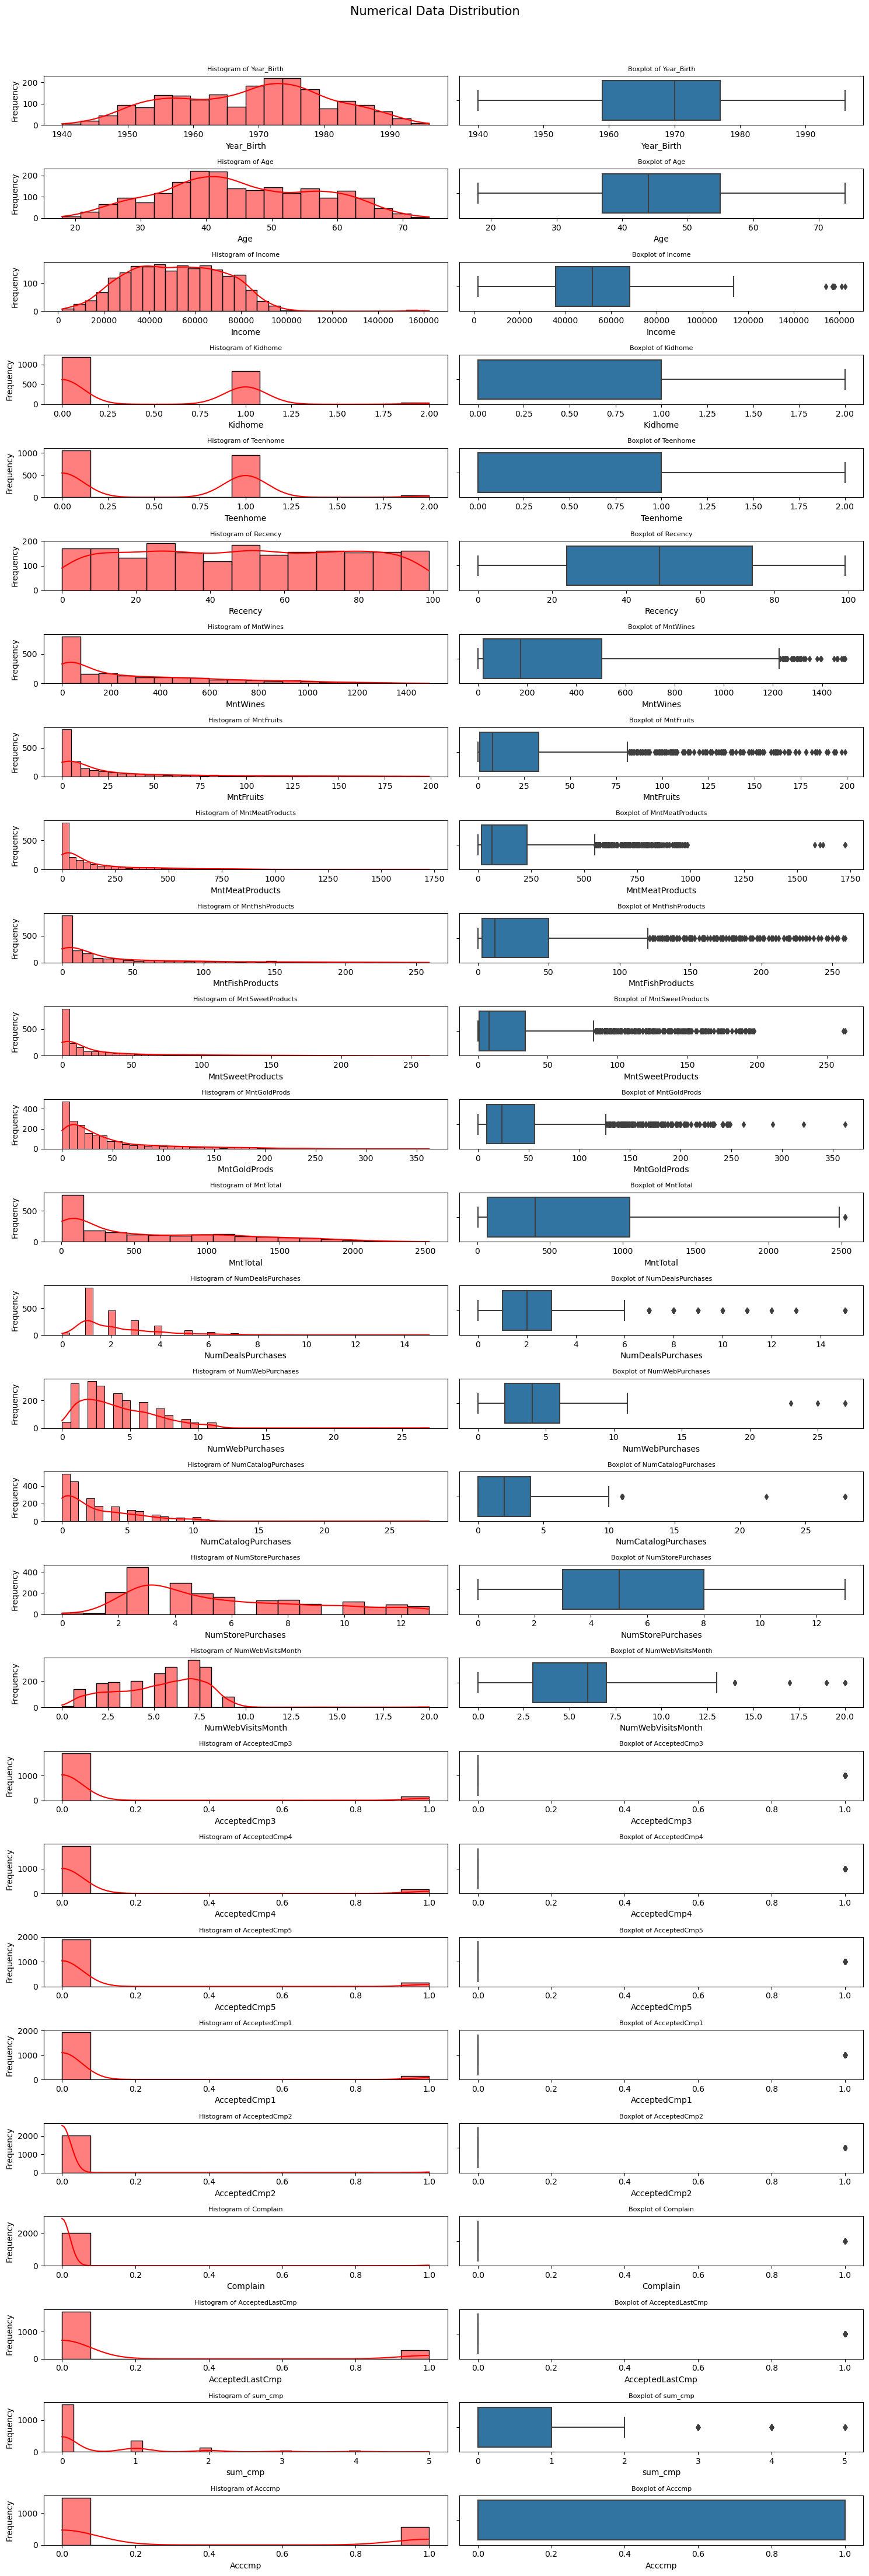

In [40]:
# Numerical Data distribution visualizations

plt.figure(figsize=(15, 45))

for index, col in enumerate(numerical_col):
    if col == 'ID':
        continue
    else:
        # Histogram
        plt.subplot(len(numerical_col), 2, index * 2 + 1)
        sns.histplot(df[col], kde=True, color='red')
        plt.title(f'Histogram of {col}', size=8)
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Boxplot
        plt.subplot(len(numerical_col), 2, index * 2 + 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}', size=8)
        plt.xlabel(col)

plt.suptitle('Numerical Data Distribution', size=15)
plt.tight_layout()
plt.show()

- Secara statistik dengan uji normal test dan juga secara visualisasi histogram terlihat jelas bahwa data pada setiap kolom tidak terdistribusi normal
- Kebanyakan data persebarannya right-skewed/positive skew
- Berdasarkan visualisasi boxplot terlihat bahwa terdapat outliers, namun outlier tersebut tidak terlalu jauh dari persebaran kebanyakan data, sehingga masih cukup masuk akal untuk dianalisis

In [41]:
categorical_col = [var for var in df.columns if df[var].dtypes == 'object']

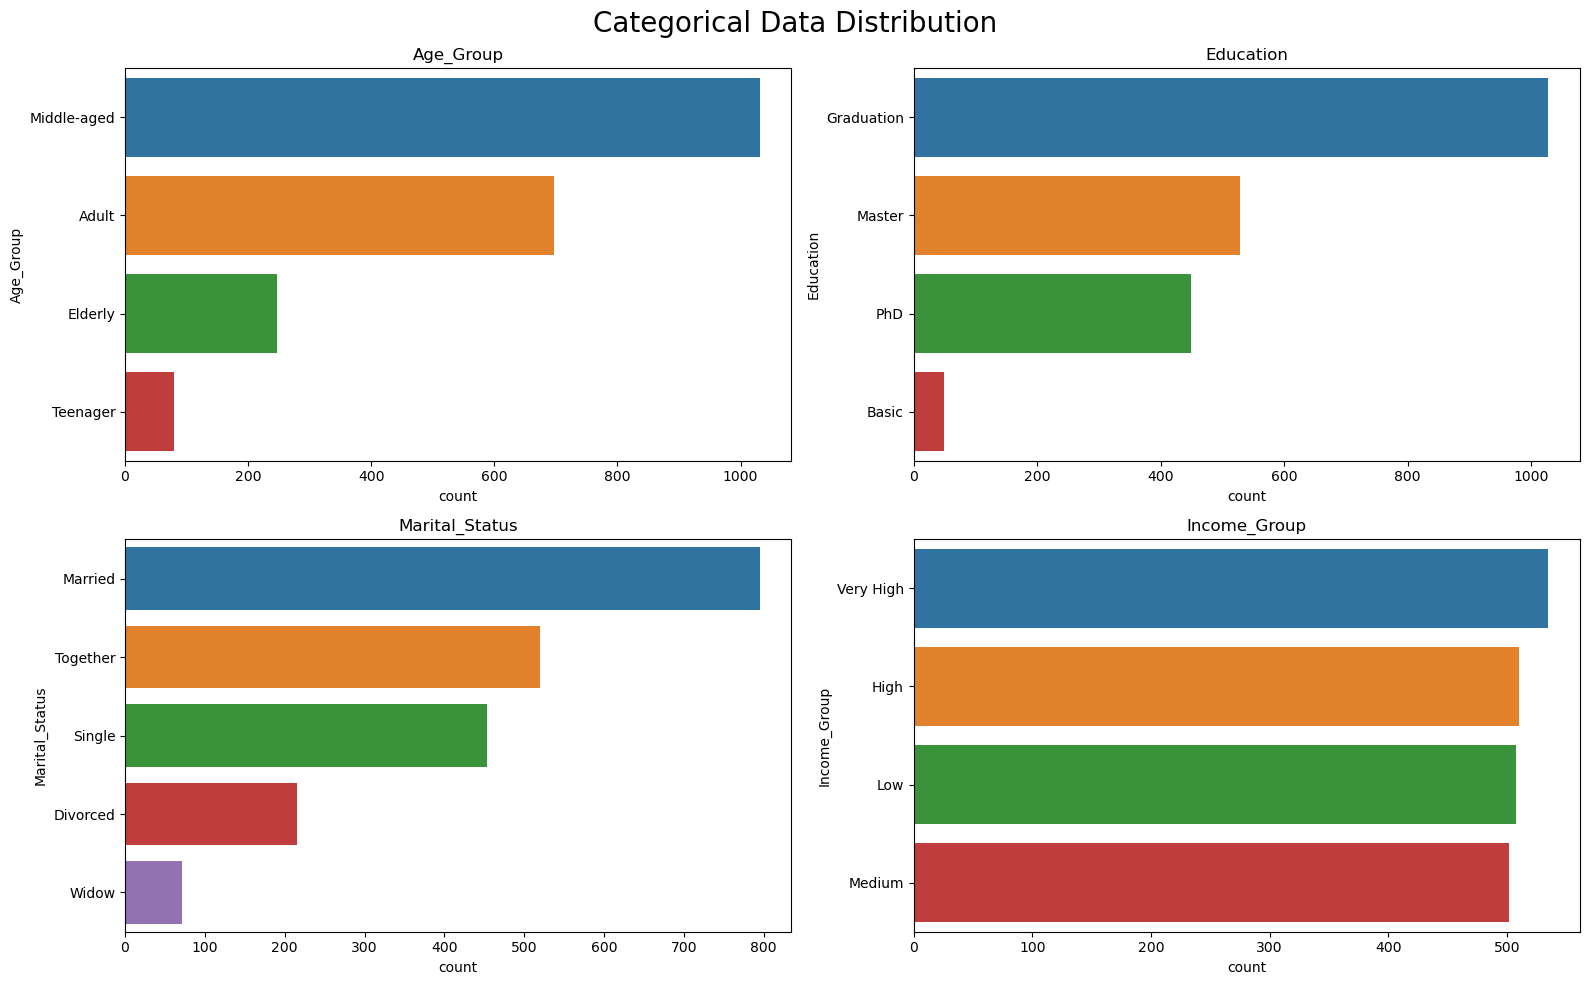

In [42]:
# Categorical data distribution

fig, axes = plt.subplots(2,2, figsize=(16,10)) 
for x, z in zip(categorical_col, axes.flatten()):
    ax = sns.countplot(data=df, y= x, ax= z, order=df[x].value_counts().index)
    ax.set_title(f'{x}', size = 12) 

plt.suptitle('Categorical Data Distribution', size=20)
plt.tight_layout()
plt.show()

Persebaran data pada kolom-kolom categorical menunjukkan persebaran data yang bervariasi. Persebaran data tersebut menunjukkan demografi customer kebanyakan adalah pada kelompok umur Middle-aged yang sudah menikah dengan pendidikan terakhir graduation. Namun demografi customer income_group terlihat persebaran data yang cukup merata, yaitu sekitar 500 customer dalam setiap kelompok incomenya

### Correlation

#### Permasalahan : Faktor yang mempengaruhi penjualan

interval columns not set, guessing: ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Acccmp']


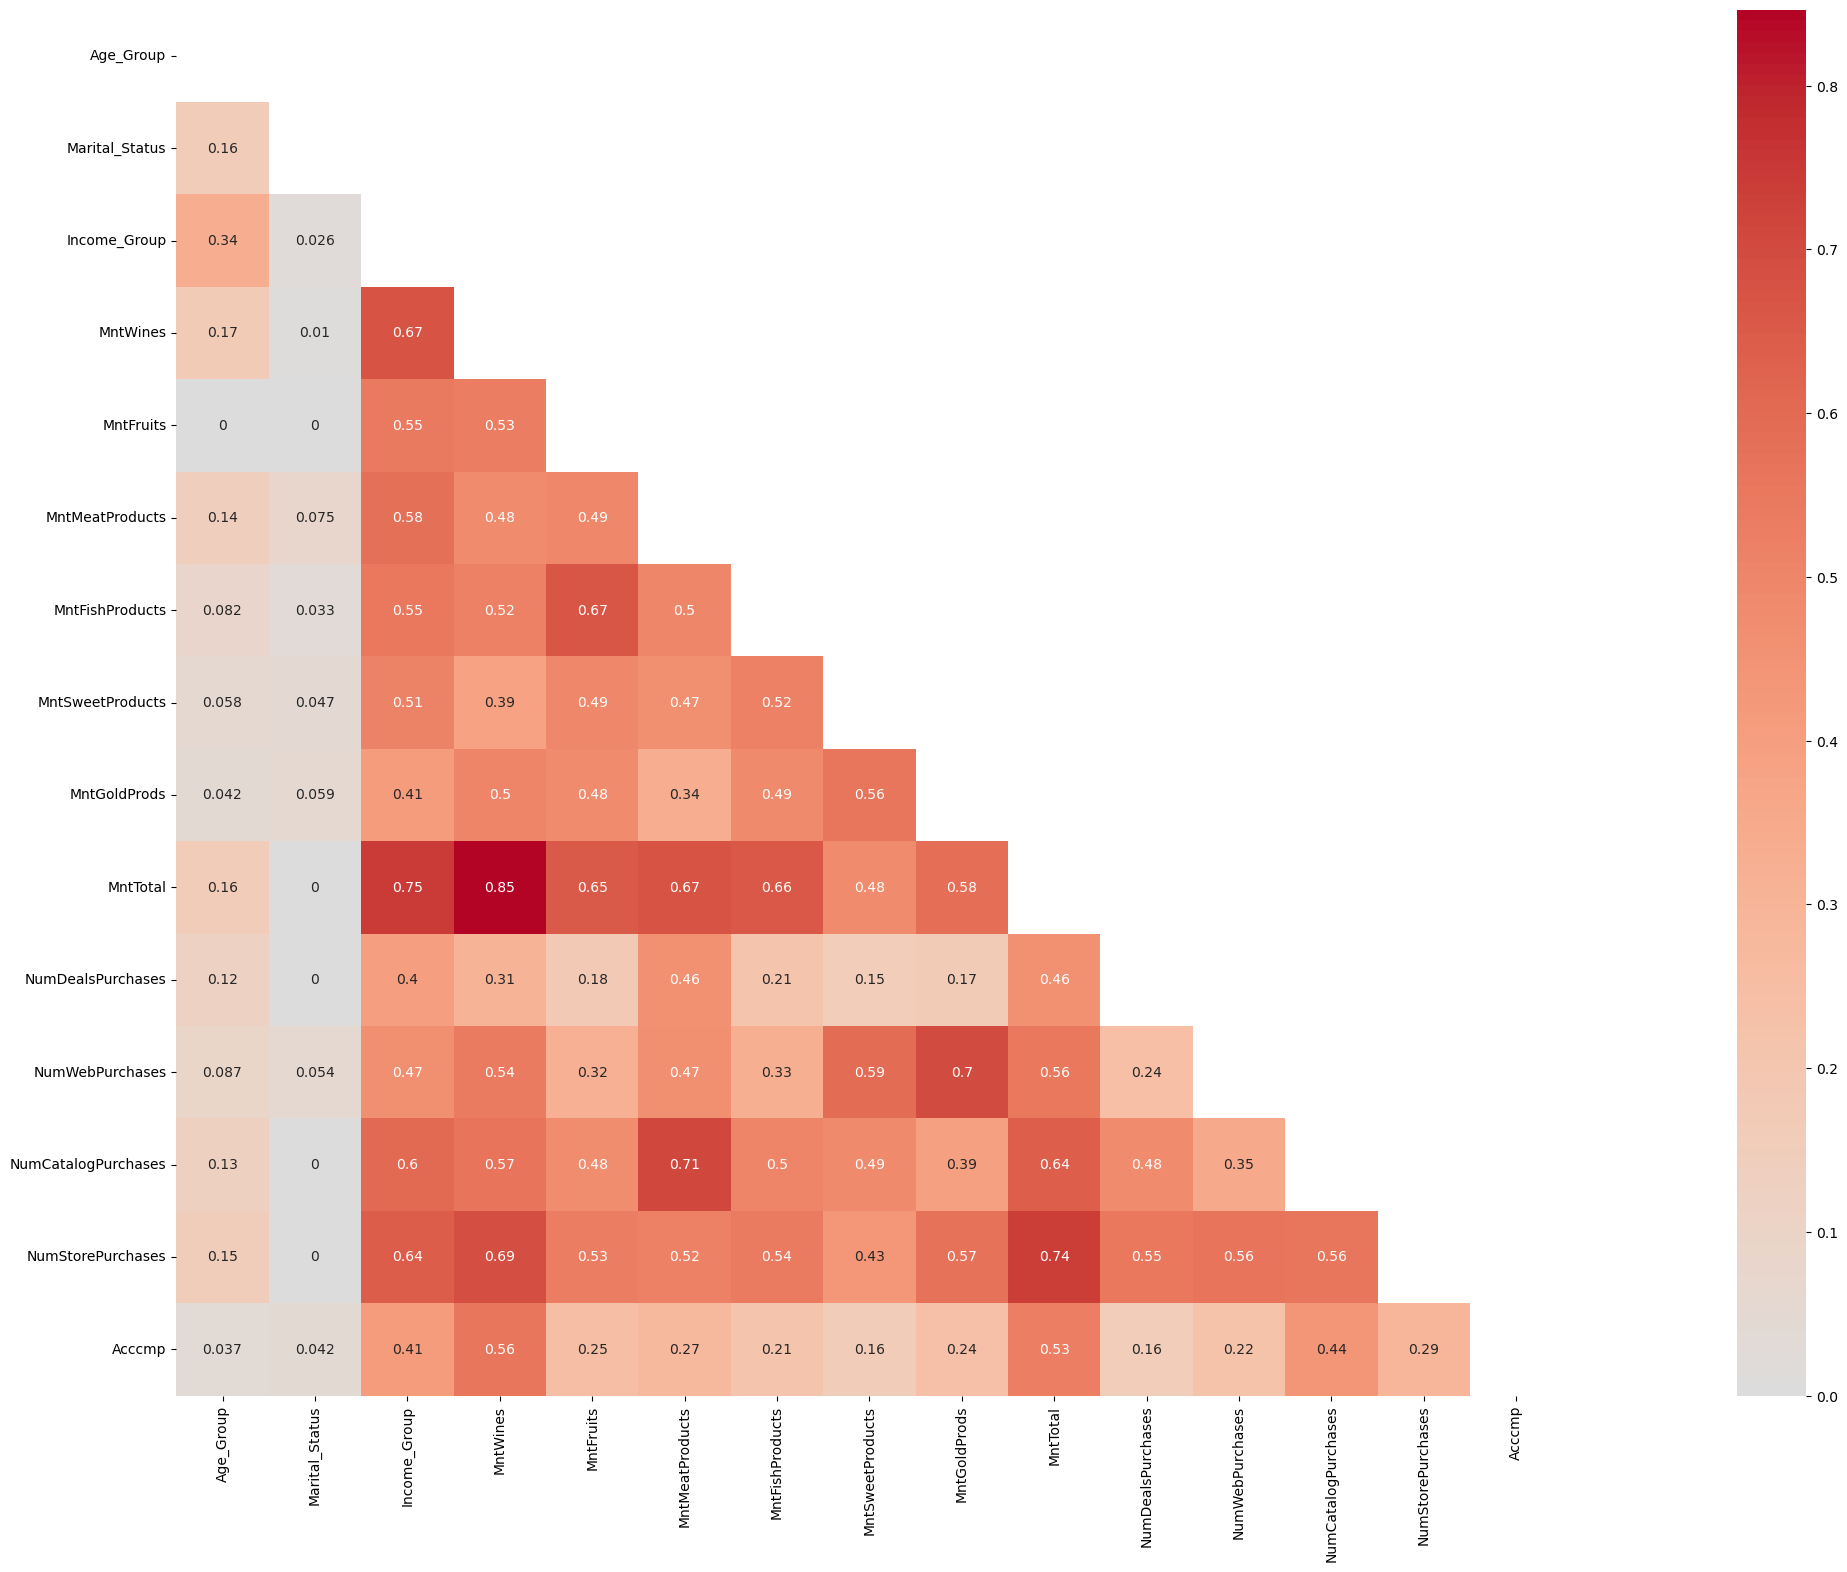

In [43]:
plt.figure(figsize=(45,18))

corrmap = df[['Age_Group', 'Marital_Status', 'Income_Group', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'Acccmp']]

phik_overview = corrmap.phik_matrix()
matrix = np.triu(np.ones_like(phik_overview, dtype=bool))

sns.heatmap(phik_overview, annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

Berdasarkan hasil tes korelasi yang telah dilakukan, berikut beberapa hal yang menjadi perhatian:
- Income Group memiliki korelasi yang cukup tinggi dengan total pembelian, khususnya pada produk wines. selain itu terlihat bahwa income group juga paling berkorelasi dengan pembelian melalui toko dibandingkan dengan pembelian dari platform lain.

- Marital status adalah fitur yang paling tidak berkorelasi dengan total pembelian customer.

- Produk yang paling berkorelasi dengan total pembelian customer adalah produk wines, diikuti dengan produk meats.

- Total pembelian customer memiliki korelasi yang cukup tinggi dengan pembelian melalui toko, diikuti dengan pembelian melalui catalog.


In [44]:
def despine(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)           
    return ax

Analisa campaign yang sudah dilakukan

In [45]:
Acc_Cmp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedLastCmp']].sum()
Acc_Cmp

AcceptedCmp1       135
AcceptedCmp2        26
AcceptedCmp3       151
AcceptedCmp4       158
AcceptedCmp5       148
AcceptedLastCmp    312
dtype: int64

In [46]:
fig = make_subplots(
    rows=1,
    cols=1,
    column_titles= ['Customers Accepted Campaign'],
    y_title= 'Total'
)

cmp = go.Bar(
    x=Acc_Cmp.index,
    y=Acc_Cmp.values,
    hovertemplate='%{x}, Customers Attracted: %{y}',
    orientation='v',
    marker_color=['navy','red','navy','navy','navy','gold']
)

fig.add_trace(cmp, 1,1)

fig

Insight :
- Campaign 2 merupakan campaign yang paling gagal dalam menarik customer, terlihat dari jumlah customer yang menerimanya paling sedikit yaitu hanya 26 orang

- Campaign terakhir yang dilakukan merupakan campaign yang paling sukses karena paling banyak menarik customer sebanyak 313 orang

- Campaign 1,3,4,5 bisa terbilang cukup berhasil dalam menarik customer, walaupun tidak seberhasil campaign yang terakhir, namun ke-4 campaign tersebut cukup stabil dalam menarik customer yaitu dalam rentang 135-158 orang

Namun, apakah campaign yang selama ini dilakukan cukup signifikan dalam meningkatkan penjualan?

In [47]:
cmpsum = df.groupby('Acccmp')[['Acccmp']].count().rename(columns={'Acccmp':'Total'}).reset_index()

cmpsum.index = ['Regular Customers(w/o cmp)', 'Customers Accepted Campaign']

In [48]:
fig_pie = go.Figure(data=[go.Pie(labels=cmpsum.index, values=cmpsum['Total'])])
fig_pie.update_layout(title='Percentage of Accepted Campaign')
fig_pie.update_traces(hole=0.7, hoverinfo="label+value+name")

fig_pie.update_layout(
    title_text="Regular Customers VS Campaign Customers",
    showlegend=False,
    annotations=[dict(text="Total Customers", x=0.17+0.33, y=0.65, font_size=15, showarrow=False),
                 dict(text=str(cmpsum['Total'].sum()), x=0.190+0.31, y=0.55, font_size=15, showarrow=False),
                 dict(text="Campaign", x=0.460, y=0.370, font_size=10, showarrow=False),
                 dict(text="Regular", x=0.525, y=0.370, font_size=10, showarrow=False),
                ])

fig_pie.add_shape(type="rect",
    x0=0.1+0.35,
    y0=0.40, 
    x1=0.2+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="Red",
)


fig_pie.add_shape(type="rect",
    x0=0.18+0.06+0.27, 
    y0=0.40, 
    x1=0.2+0.06+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="LightSkyBlue",
)

fig_bar = go.Figure(data=[go.Bar(
    y=cmpsum.index,
    x=cmpsum['Total'],
    hovertemplate='%{x}, Customers Attracted: %{y}',
    orientation='h',
    marker=dict(color=['LightSkyBlue','red']))])

fig_bar.update_layout(title='Total Accepted Campaign')

fig_pie.show()
fig_bar.show()


Setelah dianalisa lebih jauh terlihat bahwa dari total 2055 customer dalam database, hanya sebanyak 568 customer yang setidaknya pernah menerima 1 dari 6 campaign uang pernah dilakukan. Sedangkan sisanya, sebanyak 1487 customer tidak pernah menerima campaign. Kita bisa melihat proporsi yang cukup kecil dari customer yang pernah menerima campaign, yaitu hanya sebesar 27% dari total customer.

Hal ini bisa saja menunjukkan bahwa sebuah campaign yang dilakukan tidak begitu efektif, karena tidak banyak customer yang menerimanya jika dibandingkan dengan total customer. Selain itu dari analisa sebelumnya juga terlihat bahwa campaign yang dilakukan tidak banyak menarik customer yang baru karena para penerima campaign kebanyakan adalah para customer yang sebelumnya sudah pernah menerima campaign, terlihat dari jumlah campaign yang diterima adalah 772, sedangkan jumlah customer penerimanya adalah 568 (mengindikasikan beberapa campaign diterima oleh customer yang sama)

Analisa Platform Penjualan 

In [49]:
CustomerBuyPlace = df[['NumWebPurchases','NumStorePurchases','NumCatalogPurchases']].sum().sort_values()

In [50]:
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height()/2, f'{bar.get_width():,d} ',
            va='center', ha='right', color='white'
        )
    return ax

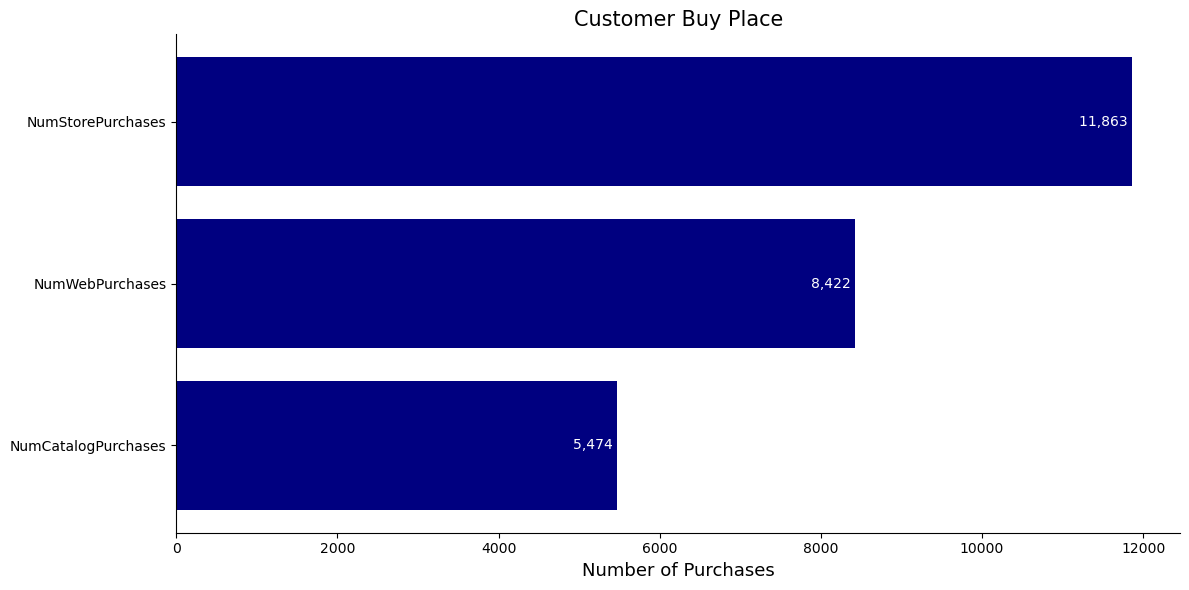

In [51]:
fig,ax = plt.subplots(figsize=(12,6))

plt.barh(CustomerBuyPlace.index, 
         CustomerBuyPlace.values,
         color='navy')

plt.title('Customer Buy Place', size=15)
plt.xlabel('Number of Purchases', size=13)
annotate_bars(ax)
despine(ax)
plt.tight_layout()
plt.show()

Preferensi Customer dalam melakukan pembelian produk ternyata masih dengan cara konvensional yaitu di toko. Terlihat bahwa sebanyak 11.863 pembelian berasal dari toko, ini adalah jumlah yang cukup besar dari total pembelian. Meski begitu platform web juga cukup banyak digunakan customer untuk melakukan pembelian, yaitu sebanyak 8.422 kali. Sedangkan Catalog paling sedikit dengan 5.474 kali. Kemungkinan besar Age group memiliki faktor dalam hal preferensi platform pembelian

In [52]:
platform_age = df.groupby('Age_Group')[['NumWebPurchases','NumStorePurchases','NumCatalogPurchases']].sum()
platform_age

,NumWebPurchases,NumStorePurchases,NumCatalogPurchases
Age_Group,,,
Adult,2560,3678,1529
Elderly,1121,1589,821
Middle-aged,4460,6123,2862
Teenager,281,473,262


In [53]:
fig = go.Figure()

for i, col in enumerate(platform_age.columns):  
    fig.add_trace(go.Bar(y=platform_age.index, x=platform_age[col], name=col, orientation='h', marker_color=f'rgba(50, {i*80}, 150, 0.6)', 
                          legendgroup=col))

fig.update_layout(barmode='stack', title='Platform Preferences per Age Group', xaxis_title='Platform Preferences', yaxis_title='Age Group')


fig.show()

- Dari semua age group, platform store konvensional masih menjadi pilihan utama customer dalam berbelanja, namun bisa terbilang selisihnya tidak begitu jauh dengan platform web. Maka kita bisa terus meningkatkan pelayanan dalam platform web agar customer lebih mudah dalam berbelanja sambil mempertahankan pelayanan dalam store konvensional

- Sedangkan catalog tidak terlalu baik dalam platform penjualan, ini bisa menjadi bahan pertimbangan apakah kita hanya perlu memfokuskan pada platform store dan web saja agar lebih terarah dan bisa terus meningkatkan penjualan dari 2 platform saja.

In [83]:
WebVisitor = df['NumWebVisitsMonth'].sum()
WebBuyers = df['NumWebPurchases'].sum()

web = pd.DataFrame({
    'Customers': [(WebVisitor-WebBuyers), WebBuyers],
}, index=['Visit Only', 'Visit & Buy'])

web.to_csv("web.csv")


In [55]:
fig_pie = go.Figure(data=[go.Pie(labels=web.index, values=web['Customers'])])
fig_pie.update_layout(title='Percentage of Accepted Campaign')
fig_pie.update_traces(hole=0.7, hoverinfo="label+value+name")
fig_pie.update_layout(
    title_text="Web Buy-rates",
    showlegend=False,
    annotations=[dict(text="Total Web Retention", x=0.17+0.33, y=0.65, font_size=15, showarrow=False),
                 dict(text=str(web['Customers'].sum()), x=0.190+0.31, y=0.55, font_size=15, showarrow=False),
                 dict(text="Visit only", x=0.460, y=0.370, font_size=10, showarrow=False),
                 dict(text="Buy", x=0.525, y=0.370, font_size=10, showarrow=False),
                ])

fig_pie.add_shape(type="rect",
    x0=0.1+0.35,
    y0=0.40, 
    x1=0.2+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="Red",
)


fig_pie.add_shape(type="rect",
    x0=0.18+0.06+0.27, 
    y0=0.40, 
    x1=0.2+0.06+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="LightSkyBlue",
)

fig_pie.show()

Conversion rate pada website kita sudah cukup baik, terlihat bahwa dari 10.928 total retensi traffic yang masuk ke website, sekitar 77% melakukan pembelian. hanya 22% customer yang tidak jadi melakukan pembelian. Kita bisa meningkatkan efektivitas platform web kita, salah satunya dengan memberikan discount ongkos kirim dengan minimum jumlah pembelian. Hal ini sering kali menjadi salah 1 faktor utama customer tidak jadi melakukan pembelian (Ongkos kirim yang dirasa terlalu mahal). Selain itu kita juga perlu memastikan bahwa kita memiliki opsi pembayaran yang lengkap secara online untuk memudahkan customer

In [56]:
MntProducts = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().sort_values()

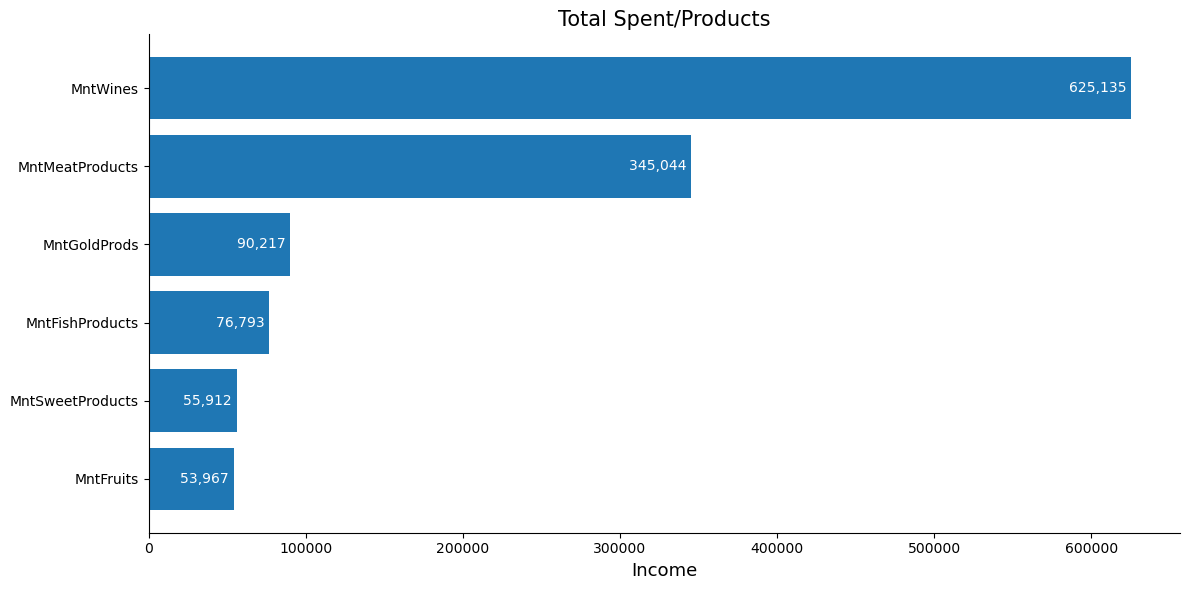

In [57]:
fig,ax = plt.subplots(figsize=(12,6))

plt.barh(MntProducts.index, 
         MntProducts.values)

plt.title('Total Spent/Products', size=15)
plt.xlabel('Income', size=13)
annotate_bars(ax)
despine(ax)
plt.tight_layout()
plt.show()

Wines adalah produk yang paling banyak dibeli oleh customer menghasilkan pendapatan hingga 625.000 dollar, nilai ini begitu besar hingga nyaris 2 kali lipat produk terbanyak ke-2 yang dibeli customer yaitu meat sebesar 345.000 dollar. kedua produk ini adalah sumber pendapatan terbesar dari supermarket kita, berbanding terbalik dengan 4 produk lainnya yang hanya menghasilkan sekitar 270.000 dollar jika digabungkan. Penjualan yang tidak begitu baik.

In [58]:
mnt_per_age = df.groupby('Age_Group')['MntTotal'].sum().sort_values()

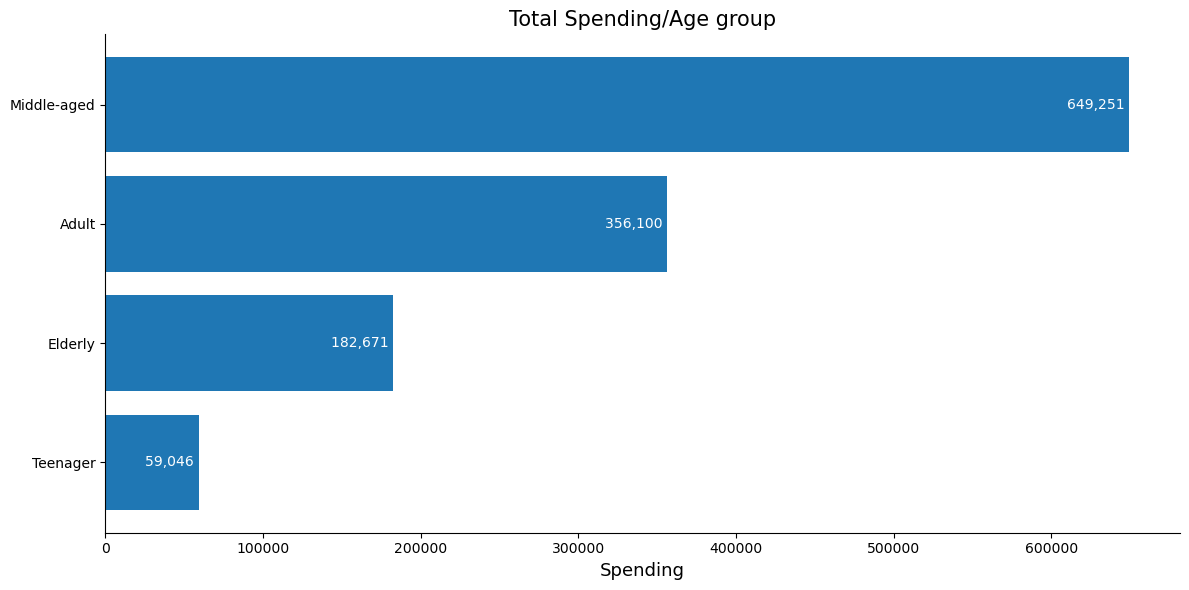

In [59]:
fig,ax = plt.subplots(figsize=(12,6))

plt.barh(
        mnt_per_age.index,
        mnt_per_age.values
)

annotate_bars(ax)
plt.title('Total Spending/Age group', size=15)
plt.xlabel('Spending', size=13)
despine(ax)
plt.tight_layout()
plt.show()

Customer dengan umur middle age paling banyak total spent nya pada supermarket kita. sedangkan customer dengan umum Teenager paling sedikit. Kita bisa menyimpulkan target pasar supermarket kita lebih mengarah ke orang2 yang lebih tua dibandingkan yang muda, ini bisa mempengaruhi cara campaign dan platform yang digunakan.

In [60]:
prods_per_age = df.groupby('Age_Group')[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum()

prods_per_age = prods_per_age.reindex(['Teenager', 'Adult', 'Middle-aged', 'Elderly'])


In [61]:
fig = go.Figure()

colors = ['darkblue', 'darkgoldenrod', 'darkred', 'salmon', 'darkorchid','darkgreen']

for i, col in enumerate(prods_per_age.columns):  
    fig.add_trace(go.Bar(y=prods_per_age.index, x=prods_per_age[col], name=col, orientation='h', marker_color=colors[i], 
                          legendgroup=col))

# Update layout
fig.update_layout(barmode='stack', title='Stacked Bar Plot', xaxis_title='Amount total spend', yaxis_title='Age Group')

# Tampilkan plot
fig.show()

- Produk Wines adalah produk dengan total spending paling besar dari setiap age group, diikuti dengan produk meats. sedangkan produk yang total spendingnya terkecil dari setiap age group adalah produl sweet.

- Age group Middle-aged memiliki total spending terbesar dari age group yang lain dengan selisih yang cukup banyak, bahkan hampir 2 kali lipat dari age group adult yang total spendingnya terbesar ke-2. Sedangkan, yang terkecil adalah age group Teenager.

- Secara umum proporsi jenis produk yang dibeli oleh setiap age group cukup sama. Untuk lebih jelasnya, mari kita analisa lebih lanjut

Mengubah value dari tabel agregasi yang sudah dibuat menjadi persentase

In [62]:
prods_per_age['MntTotalGroup'] = prods_per_age[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].apply(sum, axis=1)

for column in prods_per_age.columns:
    prods_per_age[column] = round((prods_per_age[column] / prods_per_age['MntTotalGroup']) * 100)

prods_per_age.drop(columns='MntTotalGroup', inplace=True)

In [63]:
top_labels = ['Wine', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold']
              
colors = ['darkblue', 'darkcyan', 'darkgoldenrod', 'darkorchid', 'salmon', 'darkgreen']

x_data = prods_per_age.values

y_data = prods_per_age.index

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))
        
fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

fig.update_layout(
    title={'text': "Percentage of Products Bought per Age Group"}
)

annotations = []
for yd, xd in zip(y_data, x_data):
    
    
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))

    
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))

    #
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))

    space = xd[0]
    for i in range(1, len(xd)):
            
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))

            
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()

Terlihat jelas bahwa dari age group manapun berikut adalah urutan persentase total spend produk, dari yang terbesar:
1. Wine
2. Meat
3. Gold
4. Fish
5. Fruit
6. Sweet

- Semakin tinggi Age groupnya, produk wine semakin besar proporsi spendingnya. Sedangkan semakin rendah age groupnya, produk meat cenderung semakin besar proporsi spendingnya (kecuali pada age group elderly).

- Produk Fruits dan fish khususnya perlu menjadi perhatian lebih lanjut karena persentase pembeliannya yang sangat rendah, mengingat pada analisa sebelumnya kita tahu bahwa age group yang terbanyak berbelanja adalah 'Middle-aged' (41-60 tahun) dan elderly (> 60 tahun) yang menempati posisi ke 3 jumlah customernya. Dan, seharusnya customers pada age group tersebut lebih banyak berbelanja produk-produk yang sehat, seperti fish dan fruit. Asumsinya adalah kemungkinan produk fruits dan fish yang kita jual kualitasnya tidak begitu bagus, atau kemungkinan lainnya adalah harga yang kita pasang untuk produk2 tersebut lebih mahal jika dibandingkan dengan supermarket lain. Maka, kita perlu memastikan kualitas dari produk-produk kita, dan bisa menggunakan strategi pemberian discount untuk menarik customer.

## `RFM Analysis`

### Recency

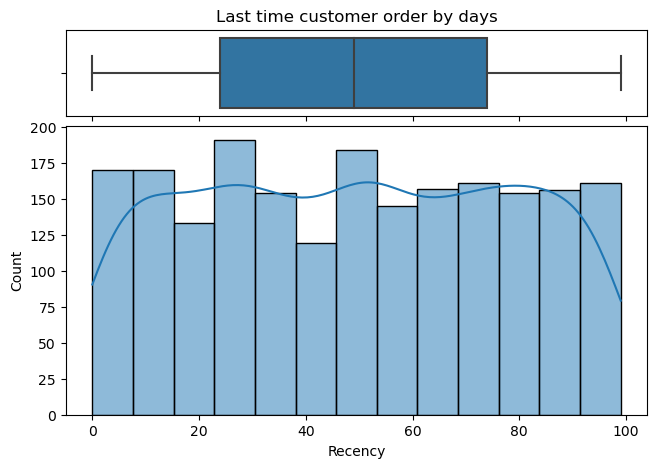

0.00     0.0
0.25    24.0
0.50    49.0
0.75    74.0
1.00    99.0
Name: Recency, dtype: float64

In [64]:
grid={
    'height_ratios':(0.15,0.5),
    'hspace':0.05
}

fig, (ax1, ax2)=plt.subplots(nrows=2, ncols=1, figsize=(7.5,5), gridspec_kw=grid)

sns.boxplot(data=df, x='Recency', ax=ax1),
sns.histplot(data=df, x='Recency', kde=True, ax=ax2 )

ax1.set(
    title='Last time customer order by days'
)

plt.show()

display(df['Recency'].quantile([0,0.25,0.5,0.75,1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan recency-nya ke dalam 4 kelompok yaitu :
- 4 (Active) : melakukan transaksi kurang dari 24 hari terakhir
- 3 (Warm) : melakukan transaksi antara 24 hingga 49 hari terakhir
- 2 (Cold) : melakukan transaksi antara 49 hingga 74 hari terakhir
- 1 (Inactive) : melakukan transaksi lebih dari 74 hari terakhir

In [65]:
df['Rscore'] = pd.qcut(df['Recency'], q=4, labels=[4,3,2,1]).astype(int)

### Frequency

In [66]:
df.insert(22, 'Frequency', df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].apply('sum', axis=1))

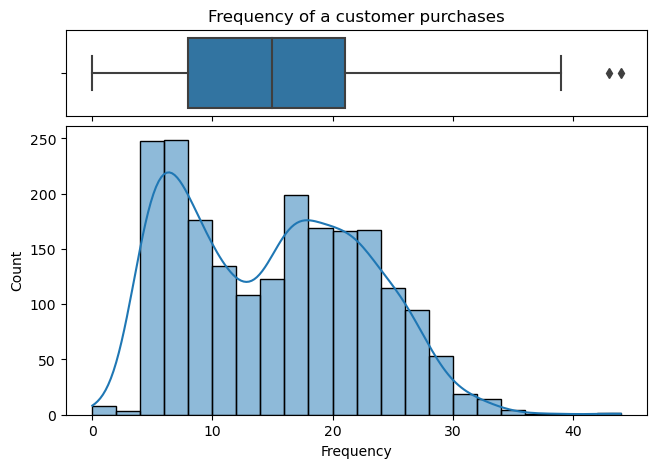

0.00     0.0
0.25     8.0
0.50    15.0
0.75    21.0
1.00    44.0
Name: Frequency, dtype: float64

In [67]:
grid={
    'height_ratios':(0.15,0.5),
    'hspace':0.05
}

fig, (ax1, ax2)=plt.subplots(nrows=2, ncols=1, figsize=(7.5,5), gridspec_kw=grid)

sns.boxplot(data=df, x='Frequency', ax=ax1),
sns.histplot(data=df, x='Frequency', kde=True, ax=ax2 )

ax1.set(
    title='Frequency of a customer purchases'
)

plt.show()

display(df['Frequency'].quantile([0,0.25,0.5,0.75,1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan frequency-nya ke dalam 4 kelompok mengacu pada jumlah transaksi yang kita tentukan yaitu:
- 4 (Loyal) : melakukan transaki lebih dari 21 kali
- 3 (High) : melakukan transaksi 15 hingga 21 kali
- 2 (Medium) : melakukan transaksi 8 hingga 15 kali
- 1 (Low) : pernah melakukan transaksi hingga 8 kali.

In [68]:
df['Fscore'] = pd.qcut(df['Frequency'], q=4, labels=[1,2,3,4]).astype(int)

### Monetary

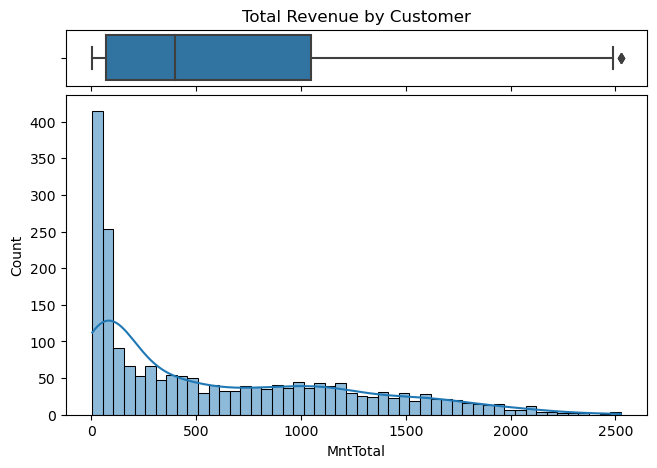

0.00       5.0
0.25      69.0
0.50     397.0
0.75    1047.5
1.00    2525.0
Name: MntTotal, dtype: float64

In [69]:
grid = {
    'height_ratios': (0.15, 0.85),
    'hspace': 0.05
}

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7.5, 5), gridspec_kw=grid)

sns.boxplot(data=df, x='MntTotal', ax=ax1)
sns.histplot(data=df, x='MntTotal', kde=True, ax=ax2, bins=50)

ax1.set(
    title='Total Revenue by Customer'
)

plt.show()

display(df['MntTotal'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan monetary-nya ke dalam 4 kelompok yaitu :
- 4 (Top Spender) : melakukan transaksi lebih dari 1047.5 dollar
- 3 (High Spender) : melakukan transaksi antara 397.0 hingga 1047.5 dollar
- 2 (Medium Spender) : melakukan transaksi antara 69.0 hingga 397. dollar
- 1 (Low Spender) : melakukan transaksi kurang dari dari 69.0 dollar

In [70]:
df['Mscore'] = pd.qcut(df['MntTotal'], q=4, labels=[1,2,3,4]).astype(int)

### Permasalahan: Customer Segmentation


In [71]:
df['rfm_score'] = df['Rscore'] + df['Mscore'] + df['Fscore']

Memberikan label pada setiap customer berdasarkan nilai rfmnya, dibagi menjadi 4 segmentasi:
- Bad : Segmentasi yang terendah dengan karakteristik terakhir kali melakukan transaksi di atas 74 hari terakhir, hanya pernah melakukan transaksi hingga 8 kali, dan total transaksi kurang dari 69 dollar

- Potential : Segmentasi yang berpotensi untuk menjadi customer tetap dengan karakteristik terakhir kali melakukan transaksi 49 - 74 hari lalu, pernah melakukan transaksi 8-15 kali, dan total transaksi antara 69-397 dollar

- Good : Segmentasi untuk customer yang cukup rutin bertransaksi dengan karakterisik terakhir kali melakukan transaksi 24-49 hari lalu, melakukan transaksi 15-21 kali, dan total transaksi antara 397-1047.5 dolar

- Loyal: Segmentasi terbaik, customer yang menjadi langganan dengan karakteristik terakhir kali melakukan transaksi di bawah 24 hari lalu, melakukan transaksi lebih dari 21 kali, dan total transaksi lebih dari 1047.5 dolar

In [72]:
def rfm_segmen(x):
    if x <=5:
        return 'Bad'
    
    elif x<=7:
        return 'Potential'
    
    elif x<=10:
        return 'Good'
    
    else:
        return 'Loyal'
    

df['rfm_level'] = df['rfm_score'].apply(rfm_segmen)

Persebaran customer setelah di-segmentasi

In [73]:
import plotly.express as px

color_map = {'Loyal' : 'gold', 'Good' : 'green', 'Potential' : 'blue', 'Bad' : 'red'}

fig = px.scatter_3d(
    df, 
    x='Recency', 
    y='Frequency', 
    z='MntTotal',
    color='rfm_level', 
    color_discrete_map=color_map, 
)
                          
fig.update_traces(marker_size = 3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "RFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                   legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")

Persebaran segmentasi customer terlihat cukup merata, namun sekilas terlihat bahwa kebanyakan customer berada dalam segmentasi "Good", sedangkan segmentasi 'loyal' hanya memiliki sedikit customer. Dengan perlakuan yang tepat customer yang berada pada segmentasi "Good" bisa menjadi customer "loyal", apalagi dengan proporsinya yang terbesar dalam segmentasi. Hal yang patut diperhatikan juga adalah persebaran segmentasi "bad" yang cukup besar dan dense, sehingga perlu dilakukan treatment terhadap customer yang berada pada segmentasi "bad".

In [74]:
rfm_count = df['rfm_level'].value_counts()
rfm_pct = df['rfm_level'].value_counts(normalize=True)*100

In [75]:
fig_bar = go.Figure(go.Bar(
    x=rfm_count.index, 
    y=rfm_count.values, 
    marker=dict(color=['lightgreen','red','skyblue','gold']), 
    name='Count'))

fig_bar.update_layout(title='Segmentation Distribution')

fig_pie = go.Figure(go.Pie(
    labels=rfm_pct.index, 
    values=rfm_pct.values.round(), 
    marker=dict(colors=['lightgreen','red','skyblue','gold']),
    name='Percentage',
    hoverinfo=['label+percent'],
    textinfo='label+percent',
    textfont_size=15,
    ))

fig_pie.update_layout(title='Segmentation Percentage')

fig_bar.show()
fig_pie.show()

Positive Takeaway:
- Sebesar 51% proporsi dari seluruh customer berada dalam segmentasi Good(39%) dan Loyal(12%), yang mengartikan bahwa kita memiliki customer tetap yang cukup baik. Dan dengan perlakuan yang tepat, segmentasi Loyal masih bisa ditingkatkan lebih jauh mengingat mayoritas customer sudah berada pada segmentasi good

Negative Takeaway:
- Segmentasi yang memiliki jumlah customer terbesar ke-2 adalah 'Bad' dengan jumlah 527 orang (26%) dari seluruh customer dalam database. Hal ini bisa saja disebabkan oleh campaign yang kurang efektif seperti yang sudah kita bahas di atas. Kita perlu menganalisanya lebih jauh untuk mengetahui treatment apa yang cocok

In [76]:
tot_mnt_rfm = df.groupby('rfm_level')[['MntTotal']].sum().reset_index().sort_values(by='MntTotal')
tot_mnt_rfm

,rfm_level,MntTotal
0,Bad,38159
3,Potential,119445
2,Loyal,319662
1,Good,769802


In [77]:
prods_per_rfm = df.groupby('rfm_level')[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum()

prods_per_rfm = prods_per_rfm.reindex(['Bad', 'Potential', 'Good', 'Loyal'])

In [78]:
fig = go.Figure()

colors = ['darkblue', 'darkgoldenrod', 'darkred', 'salmon', 'darkorchid','darkgreen']

for i, col in enumerate(prods_per_rfm.columns):  
    fig.add_trace(go.Bar(y=prods_per_rfm.index, x=prods_per_rfm[col], name=col, orientation='h', marker_color=colors[i], 
                          legendgroup=col))

# Update layout
fig.update_layout(barmode='stack', title='Total Spending of RFM Segmentation per Items', xaxis_title='Amount total spend', yaxis_title='RFM Segmentation')

# Tampilkan plot
fig.show()

*Insight Segmentation*: 
- Segmentasi Good adalah kelompok yang total spendingnya paling besar di antara kelompok lain. hal ini wajar karena jumlah kelompoknya yang paling besar dibanding dengan kelompok lain seperti yang sudah kita lihat di analisa sebelumnya. Namun, para customer yang berada pada segmentasi ini diharapkan bisa naik tingkat menjadi segmentasi Loyal. Salah 1 strategi yang bisa dilakukan adalah dengan memberikan program membership yang ditawarkan kepada mereka dengan benefit-benefit yang menarik agar mereka bisa menjadi customer loyal

- Segmentasi Loyal berada pada urutan ke 2 dengan selisih yang cukup jauh dengan kelompok good, hampir terpaut 2 kali lipat lebih kecil dibandingkan total spend kelompok tersebut. Namun kita dapat membuat program membership yang ditawarkan kepada segmentasi ini untuk mendapatkan benefit lebih banyak dari supermarket untuk terus mempertahankan customer yang sudah berada dalam segmentasi ini dan untuk menarik lebih banyak customer dari segmentasi good ke loyal.

- Untuk segmentasi Bad dan Potential kita bisa menerapkan discount untuk produk-produk tertentu yang mereka minati. Misalnya terlihat bahwa produk wines dan meats yang paling banyak diminati oleh customer secara keseluruhan. Oleh karena itu, kita bisa memberikan discount pada produk tersebut sambil menjaga kualitasnya agar customer puas dan menjadi customer tetap.

*Insight Product*:
- Berdasarkan hasil analisis per Segmentasi customer terlihat bahwa produk Wines dan Meats masih menjadi ke 2 produk yang paling banyak dibeli oleh customer. Maka, kita bisa menjadikan 2 produk ini sebagai bahan untuk promosional content untuk menarik customer baru sekaligus meningkatkan pembelian customer yang sudah ada. Kita juga perlu memastikan untuk menjaga stock kedua produk tersebut khususnya agar kita tidak kehabisan. Namun perlu dicatat bahwa kita harus tetap mempertahankan kualitas dari produk-produk tersebut agar customer tetap puas untuk membelinya

- Produk-produk lain seperti Fish, sweet, dan fruits hanya terjual sedikit jika dibandingkan dengan wines dan meat. Produk-produk ini khususnya perlu lebih diperhatikan apakah ada faktor lain yang membuat customer tidak membelinya. Misalnya, produk ini mungkin tidak cocok dengan segmentasi customer yang kita miliki, atau mungkin kualitas dari produk-produk ini yang kita jual tidak tergolong baik atau harganya yang lebih tinggi jika dibandingkan dengan supermarket lain. 

Mencari korelasi antara rfm level dengan demografi customer.

interval columns not set, guessing: ['Age', 'Kidhome', 'Teenhome', 'MntTotal', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Acccmp', 'rfm_score']


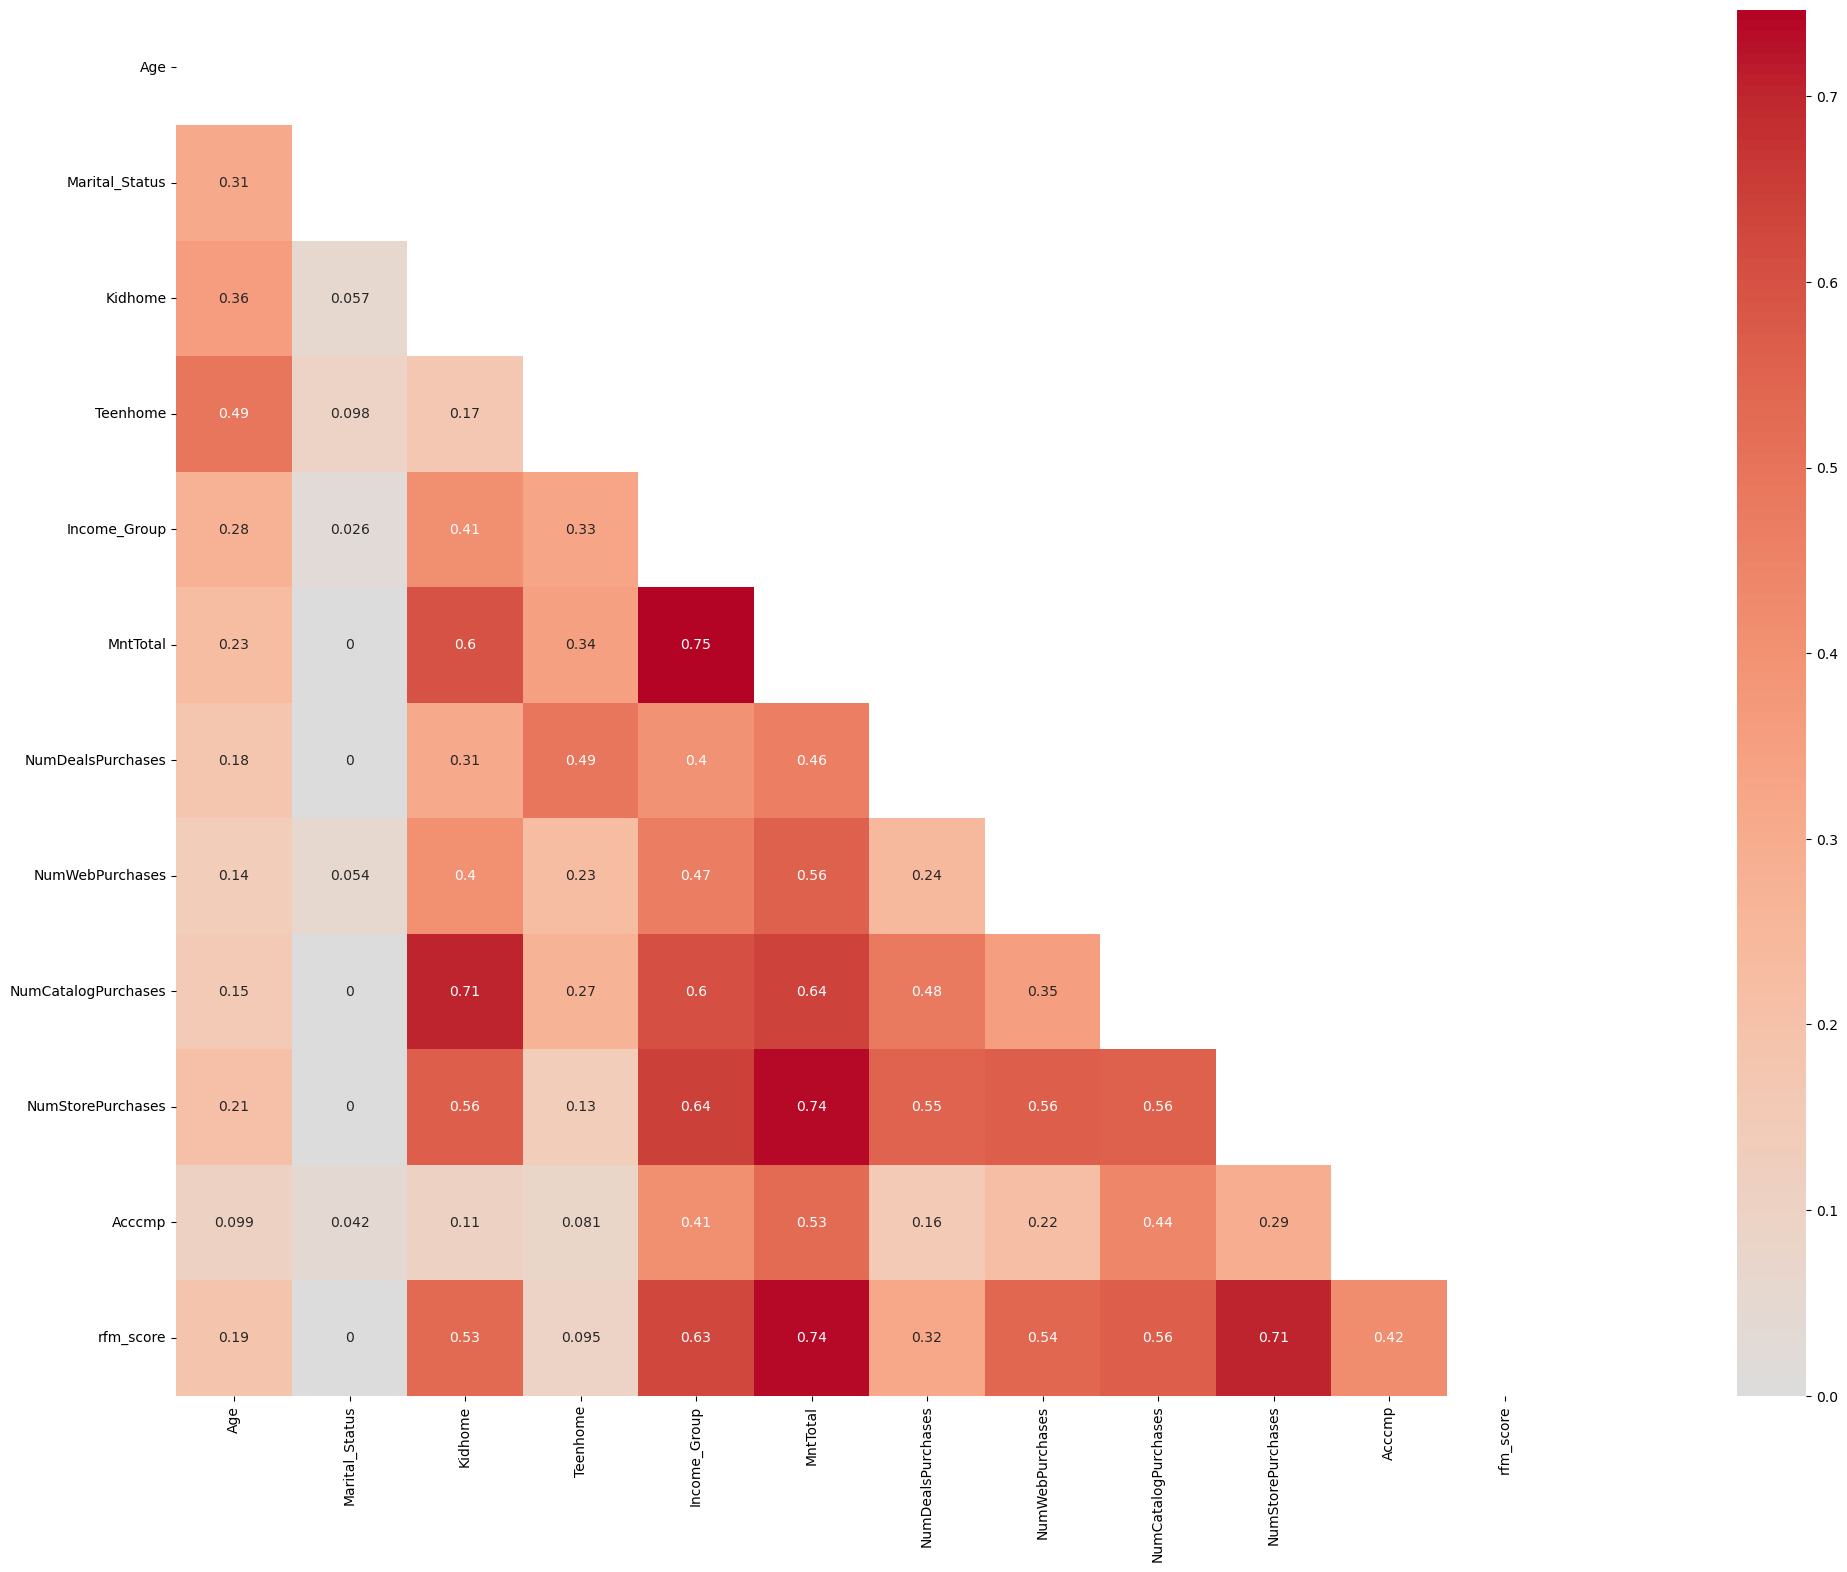

In [79]:
plt.figure(figsize=(45,18))

corrmap = df[['Age', 'Marital_Status', 'Kidhome', 'Teenhome','Income_Group', 'MntTotal',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'Acccmp', 'rfm_score']]

phik_overview = corrmap.phik_matrix()
matrix = np.triu(np.ones_like(phik_overview, dtype=bool))

sns.heatmap(phik_overview, annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

- Segmentasi user berdasarkan RFM menunjukkan ada korelasi yang kuat dengan transaksi yang dilakukan pada store konvensional dibaandingkan melalui web/catalog. Maka salah 1 strategi yang dapat dilakukan untuk terus mempertahankan dan menaikkan grup segmentasi customer adalah dengan memberikan discount pada store. Namun tidak menutup kemungkinan untuk terus meningkatkan layanan pada platform web untuk meningkatkan penjualan

- Korelasi yang kuat juga terdapat antara kolom rfm_score dengan Income_Group yang menunjukkan bahwa kebanyakan customer pada supermarket ini adalah para karyawan yang mana kebanyakan pasti bekerja pada hari senin-jumat. Maka berhubungan dengan strategi sebelumnya, kita dapat membuat diskon di store pada weekend dimana para pekerja libur dan bisa menggunakan waktu untuk berbelanja, mereka pasti akan lebih tertarik jika kita menyediakan discount pada weekend/hari-hari libur.

- Korelasi yang tidak terlalu kuat dengan kolom Acccmp menunjukkan bahwa jumlah customer yang menerima promo tidak terlalu banyak, maka dari itu kita dapat membuat promo yang lebih besar dan lebih menarik untuk para customer sesuai dengan analisa demografi yang sudah dilakukan. Diharapkan jika campaign dibuat berdasarkan analisa demografi customer maka akan lebih efektif dan lebih menarik untuk customer.



In [80]:
dt = df.groupby(['Age_Group', 'rfm_level']).size().reset_index(name='Count')

dt

,Age_Group,rfm_level,Count
0,Adult,Bad,223
1,Adult,Good,218
2,Adult,Loyal,74
3,Adult,Potential,182
4,Elderly,Bad,46
5,Elderly,Good,116
6,Elderly,Loyal,32
7,Elderly,Potential,53
8,Middle-aged,Bad,239
9,Middle-aged,Good,440


In [81]:
fig = px.bar(dt, x='Age_Group', y='Count', color='rfm_level', barmode='group',
             title='RFM Level per Age Group',
             labels={'rfm_level': 'RFM Level', 'Count': 'Count'})
fig.show()

- Segmentasi Good adalah segmentasi yang paling banyak dalam setiap age group, kecuali pada age group adult dimana justru segmentasi Bad lah yang terbanyak. Sedangkan segmentasi loyal adalah segmentasi yang paling sedikit dalam setiap age group. ini adalah hal yang perlu ditingkatkan dengan strategi bisnis yang tepat, seperti pemberian promo maupun sistem membership untuk menarik dan mempertahankan customer.

- Customer pada age group adult paling banyak menempati segmentasi bad dibandingkan segmentasi lainnya. Ini merupakan hal yang perlu diperhatikan mengingat jumlah customer pada age group adult adalah yang ke-2 terbanyak dari total customer, terlebih lagi age group ini bisa dibilang adalah orang-orang yang berada dalam umur produktif dengan income yang cukup tinggi jika dibandingkan dengan age group lainnya. Maka jika kita bisa mendapat lebih banyak customer dari age group ini dan menjadikan mereka customer yang loyal, maka kita bisa mendapatkan profit yang lebih besar.

- Kita perlu lebih banyak melakukan marketing campaign untuk menarik customer dari age group teenager karena sedikitnya jumlah customer pada age group tersebut, padahal age group tersebut dapat berpotensi untuk memberikan profit lebih besar. Salah 1 caranya adalah dengan melakukan marketing campaign/engagement yang sesuai kepada age group ini. Misalnya melalui social media, SEO, dll. Apalagi kita sudah memiliki platform web yang bisa lebih dimanfaatkan untuk lebih menarik age group ini yang lebih mementingkan efisiensi waktu dan kemudahan, maka kita perlu terus meningkatkan platform web juga untuk menarik lebih banyak customer.

## `Conclusions & Recommendations`

> Conclusions
- Beberapa faktor yang mempengaruhi pembelian customer adalah produk(wine dan meat merupakan produk yang paling banyak dibeli), platform penjualan(store adalah preferensi customer), income customer(semakin tinggi tingkat pendapatannya maka customer cenderung lebih banyak spendingnya)

- Promotional Campaign yang sudah dilakukan selama ini masih kurang efektif dalam menarik customer baru, namun ada peningkatan yang cukup baik dalam campaign terakhir yang dilakukan. Strategi dalam campaign ke-2 tidak membuahkan hasil yang baik, campaign seperti itu perlu dihindari karena malah bisa merugikan supermarket. Sedangkan campaign yang terakhir cukup berhasil, maka kita sudah di jalan yang tepat, namun tentu masih bisa terus ditingkatkan untuk menarik lebih banyak customer baru.

- Berdasarkan segmentasi RFM, terlihat bahwa mayoritas customer berada pada label 'good' yang menandakan bahwa kebanyakan customer cukup puas dengan pelayanan maupun produk yang kita tawarkan. Namun kita tentu masih bisa menambah proporsi customer pada label 'loyal' dengan strategi yang akan direkomendasikan berikut. Namun, yang juga menjadi perhatian adalah proporsi customer pada label 'bad' juga cukup besar, maka kita perlu terus melakukan evaluasi dan perbaikan terhadap pelayanan dan kualitas produk

> Recommendations
- Meningkatkan kualitas platform website dengan memberikan discount ongkos kirim dengan minimum pembelian untuk menarik customer dalam melakukan transaksi melalui web, memastikan memiliki opsi pembayaran online yang komprehensif untuk memudahkan customer.

- Memberikan discount pada produk yang paling banyak diminati customers, yaitu wines dan meats untuk mempertahankan dan bahkan menambah jumlah customer baru. Mengevaluasi produk fish dan fruits lalu meningkatkan kualitasnya jika diperlukan karena produk ini memiliki tingkat pembelian yang sangat rendah.

- Menawarkan program membership untuk para customer yang berada pada segmentasi 'good' dan 'loyal', dengan memberikan benefit-benefit tambahan kepada mereka agar mereka bisa terus menjadi pelanggan setia supermarket.

- Meningkatkan campaign promosi yang dilakukan untuk menarik customer baru, salah 1 nya adalah kita bisa menargetkan para calon customer yang berada pada age group teenager karena sedikitnya jumlah segemntasi tersebut data kita. Bisa menggunakan promosi social media, SEO, dll.

In [82]:
df.to_csv("Supermarket_cleaned.csv")